## DA 623 Tutorial 

Roll No: 200123013

Name: Akshay Chintala

### Topic
Comparing the performance of Principal Component Analysis (PCA), Gram-Schmidt orthogonalization, and Discrete Fourier Transform (DFT) by applying and approximating a collection of random Gaussian vectors (128-dimensional each).


### Installing necessary libraries

In [46]:
!pip install scikit-learn -q
!pip install numpy -q
!pip install matplotlib -q
!pip install time -q

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


### Importing and creating necessary functions

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from sklearn.decomposition import PCA
import time

# Gram-Schmidt orthogonalization
def gram_schmidt(A):

    Q = np.empty_like(A)
    for i in range(A.shape[1]):
        q = A[:, i]
        for j in range(i):
            q -= np.dot(q, Q[:, j]) * Q[:, j]
        Q[:, i] = q / np.linalg.norm(q)
    return Q


### Performing above methods on random Gaussian vectors

Time for Gram-Schmidt: 0.1610403060913086
Time for PCA: 0.03500080108642578
Time for FFT: 0.0019996166229248047
Original: (1000, 128)
Gram-Schmidt: (1000, 128)
PCA: (1000, 128)
FFT: (1000, 128)


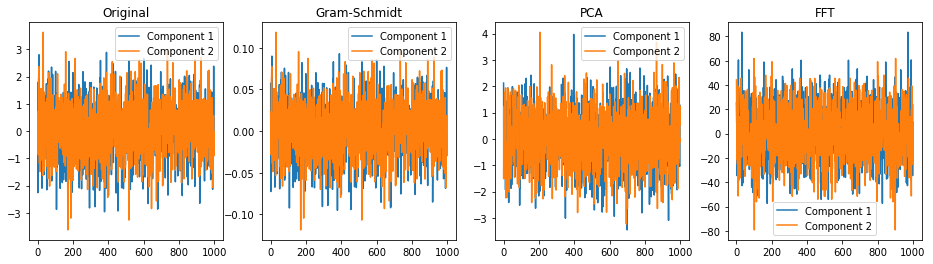

In [67]:
# Generate random gaussian vectors  
n = 1000
dim = 128
X = np.random.randn(n, dim)

# Apply Gram-Schmidt orthogonalization and perform time analysis
start = time.time()
Q = gram_schmidt(X)
end = time.time()
print('Time for Gram-Schmidt:', end - start)

# Apply PCA
start = time.time()
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
end = time.time()
print('Time for PCA:', end - start)
# P = pca.components_.T

# Apply Discrete fourier transform on the vectors
start = time.time()
F = fft(X, axis=0)
X_fft = np.real(F)
end = time.time()
print('Time for FFT:', end - start)

# Print dimensions
print('Original:', X.shape)
print('Gram-Schmidt:', Q.shape)
print('PCA:', X_pca.shape)
print('FFT:', X_fft.shape)

# Plot the first 2 components
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for i in range(2):
    ax[0].plot(X[:, i], label='Component ' + str(i + 1))
    ax[1].plot(Q[:, i], label='Component ' + str(i + 1))
    ax[2].plot(X_pca[:, i], label='Component ' + str(i + 1))
    ax[3].plot(X_fft[:, i], label='Component ' + str(i + 1))
    
ax[0].set_title('Original')
ax[1].set_title('Gram-Schmidt')
ax[2].set_title('PCA')
ax[3].set_title('FFT')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[3].legend(loc='best')
# plt.legend(loc='best')
plt.show()


The above plots show the first 3 components of the transformed data using PCA, Gram-Schmidt orthogonalization, and Discrete Fourier Transform (DFT). 

It is also observed that Gram-Schmidt is the slowest among the three methods, while FFT is the fastest. PCA is in between the two.

In [68]:
# Calculate Variances of first 3 components
print('Variances of first 3 components:')
print('Original:', np.var(X, axis=0)[:3])
print('Gram-Schmidt:', np.var(Q, axis=0)[:3])
print('PCA:', np.var(X_pca, axis=0)[:3])
# print('FFT:', np.var(X_fft, axis=0)[:3])



Variances of first 3 components:
Original: [0.96836782 0.932629   0.96592007]
Gram-Schmidt: [0.00099933 0.0009979  0.00099998]
PCA: [1.09732484 1.0703344  1.05089934]


It can be seen above that PCA captures the more variance in the data compared to gram-schmidt as PCA projects along the directions of maximum variance.

The below graphs show the projections of PCA, Gram-Schmidt and Fourier Frequencies on the first two components


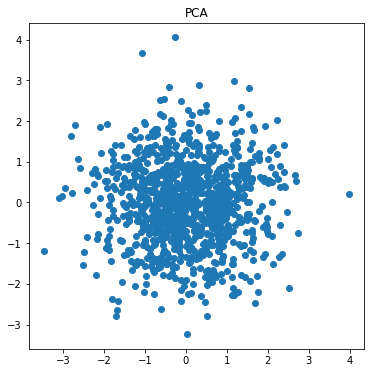

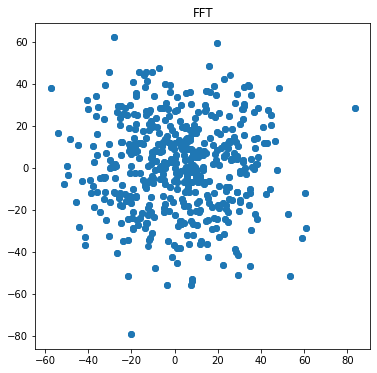

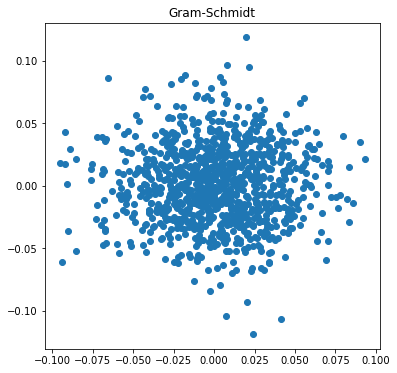

In [69]:
print("The below graphs show the projections of PCA, Gram-Schmidt and Fourier Frequencies on the first two components")
# Project the data to the first two principal components
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA')
plt.show()

# Project the data to the first two Fourier components
plt.figure(figsize=(6, 6))
plt.scatter(X_fft[:, 0], X_fft[:, 1])
plt.title('FFT')
plt.show()

# Project the data to the first two Gram-Schmidt components
X_gs = Q
plt.figure(figsize=(6, 6))
plt.scatter(X_gs[:, 0], X_gs[:, 1])
plt.title('Gram-Schmidt')
plt.show()



In [70]:

# Calculate the correlation between the first two principal components and the first two Fourier components
corr_pca_fft = np.corrcoef(X_pca[:, :2].T, X_fft[:, :2].T)
print('Correlation between the first two principal components and the first two Fourier components:')
print(corr_pca_fft)

# Calculate the correlation between the first two principal components and the first two Gram-Schmidt components
corr_pca_gs = np.corrcoef(X_pca[:, :2].T, X_gs[:, :2].T)
print('Correlation between the first two principal components and the first two Gram-Schmidt components:')
print(corr_pca_gs)

# Calculate the correlation between the first two Gram-Schmidt components and the first two Fourier components
corr_gs_fft = np.corrcoef(X_gs[:, :2].T, X_fft[:, :2].T)
print('Correlation between the first two Gram-Schmidt components and the first two Fourier components:')
print(corr_gs_fft)


Correlation between the first two principal components and the first two Fourier components:
[[ 1.00000000e+00  1.39322671e-16  1.41790353e-02  2.48479658e-02]
 [ 1.39322671e-16  1.00000000e+00 -3.74351076e-03 -2.20391590e-02]
 [ 1.41790353e-02 -3.74351076e-03  1.00000000e+00 -3.54341733e-03]
 [ 2.48479658e-02 -2.20391590e-02 -3.54341733e-03  1.00000000e+00]]
Correlation between the first two principal components and the first two Gram-Schmidt components:
[[ 1.00000000e+00  1.39322671e-16  2.33748960e-04  3.26093592e-04]
 [ 1.39322671e-16  1.00000000e+00  2.02962357e-03  2.68037805e-03]
 [ 2.33748960e-04  2.02962357e-03  1.00000000e+00 -1.18725353e-03]
 [ 3.26093592e-04  2.68037805e-03 -1.18725353e-03  1.00000000e+00]]
Correlation between the first two Gram-Schmidt components and the first two Fourier components:
[[ 1.         -0.00118725 -0.11648155 -0.00833143]
 [-0.00118725  1.         -0.01116023  0.09911185]
 [-0.11648155 -0.01116023  1.         -0.00354342]
 [-0.00833143  0.09911

C:\Users\91868\AppData\Local\Temp\ipykernel_3440\3949235392.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar()


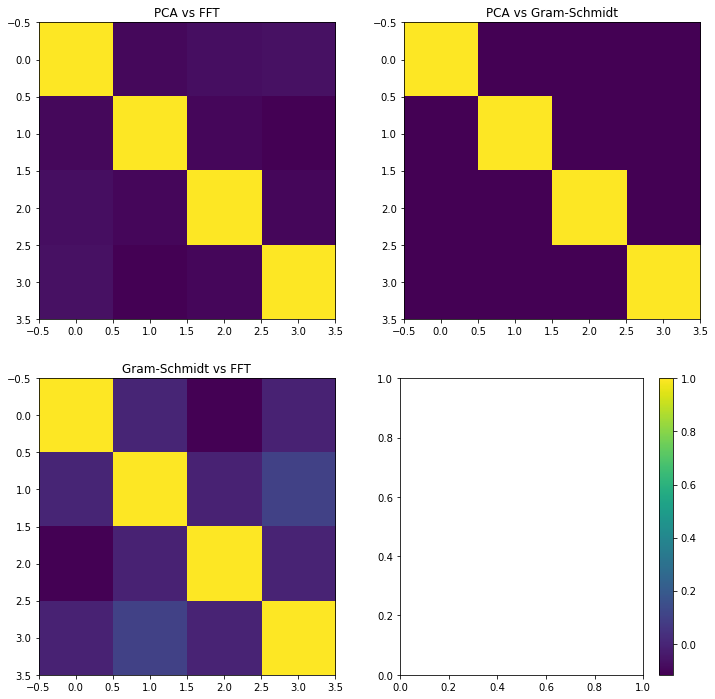

In [71]:

# Plot the correlation matrices with their corresponding x and y labels
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(corr_pca_fft)
plt.title('PCA vs FFT')
plt.subplot(222)
plt.imshow(corr_pca_gs)
plt.title('PCA vs Gram-Schmidt')
plt.subplot(223)
plt.imshow(corr_gs_fft)
plt.title('Gram-Schmidt vs FFT')
plt.subplot(224)
plt.colorbar()
plt.show()



Given below is the plot of the FFT Magnitude Spectrum

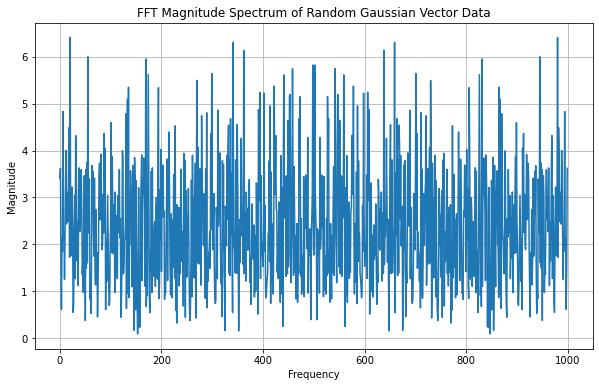

In [72]:
# Plot FFT Magnitude Spectrum
plt.figure(figsize=(10, 6))
plt.plot(np.abs(F.mean(axis=1)))
plt.title('FFT Magnitude Spectrum of Random Gaussian Vector Data')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

It can be seen that the frequencies are symmetric about the center of the plot

Peaks in the magnitude spectrum indicate dominant frequency components present in the data.

The magnitude spectrum can help identify any underlying periodic patterns or frequency structures present in the data.

Random Gaussian vector data is expected to have a relatively flat magnitude spectrum, indicating that it contains a wide range of frequencies with similar magnitudes.